<a href="https://colab.research.google.com/github/wendydonzse/708A2/blob/main/PartB_708A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
/from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd/content/gdrive/MyDrive/708/Diabetes

/content/gdrive/MyDrive/708/Diabetes


In [ ]:
ls

dataset.csv  scaled_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import uniform
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [ ]:
data = pd.read_csv('dataset.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**TASK A : Data Preprocessing**

In [ ]:
print(data.shape)
data.info()


(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**a,Clean the dataset**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Check for duplicate values
duplicate_values = data.drop_duplicates(inplace=True)
print("Duplicate values per column:")
print(duplicate_values)

Duplicate values per column:
None


In [ ]:
# Select only numeric columns for imputation
numeric_columns = data.select_dtypes(include=['number'])
# Define a threshold for outlier detection (e.g., z-score > 3)
z_threshold = 3

# Calculate z-scores for each numerical column
z_scores = stats.zscore(data.select_dtypes(include=['number']))

# Identify outliers by z-score
outliers = (abs(z_scores) > z_threshold).any(axis=1)

# Remove outliers from the DataFrame
data_no_outliers = data[~outliers]

# Check the shape of the DataFrame after removing outliers
print("Shape after removing outliers:", data_no_outliers.shape)

data = data_no_outliers.copy()
data.shape

Shape after removing outliers: (688, 9)


(688, 9)

In [ ]:
data["Outcome"].value_counts()


,count
Outcome,
0,461
1,227


**b,Perform feature scaling, normalisation**

In [ ]:
features = data.drop('Outcome', axis=1)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
# Display the scaled features
print("Scaled features:")
print(scaled_data.head())


Scaled features:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.461538  0.670968       0.489796       0.583333  0.000000  0.418478   
1     0.076923  0.264516       0.428571       0.483333  0.000000  0.228261   
2     0.615385  0.896774       0.408163       0.000000  0.000000  0.138587   
3     0.076923  0.290323       0.428571       0.383333  0.226506  0.269022   
4     0.384615  0.464516       0.510204       0.000000  0.000000  0.201087   

   DiabetesPedigreeFunction       Age  
0                  0.396963  0.617021  
1                  0.197397  0.212766  
2                  0.429501  0.234043  
3                  0.064353  0.000000  
4                  0.088937  0.191489  


**c,encode categorical variables**

In [ ]:
# Create a label encoder object
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
 data[column] = label_encoder.fit_transform(data[column])
# Display the updated DataFrame
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0  


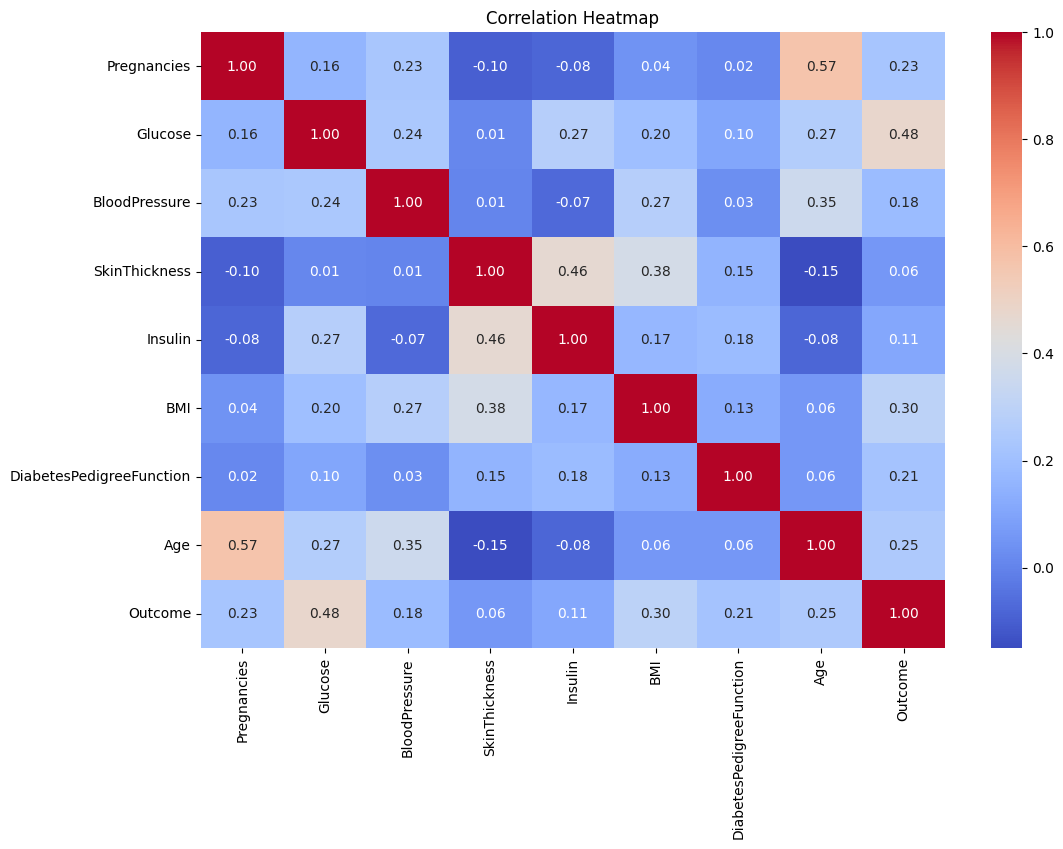

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

**d,Split the dataset into training and testing sets**

In [ ]:
#Feature Engineering
# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']               # Target variable

In [ ]:
# Printing X where we have removed traget variable
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
# Printing Y which as only traget variable
y

,Outcome
0,1
1,0
2,1
3,0
5,0
...,...
763,0
764,0
765,0
766,1


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (550, 8) (550,)
Testing set size: (138, 8) (138,)


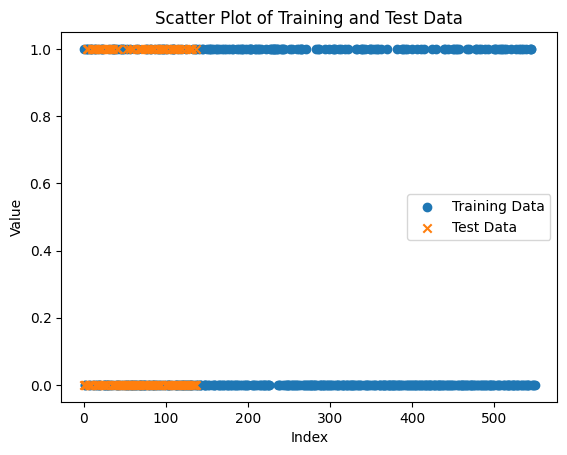

In [ ]:
# scatter plot
plt.scatter(range(len(y_train)), y_train, label='Training Data', marker='o')
plt.scatter(range(len(y_test)), y_test, label='Test Data', marker='x')
plt.title('Scatter Plot of Training and Test Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

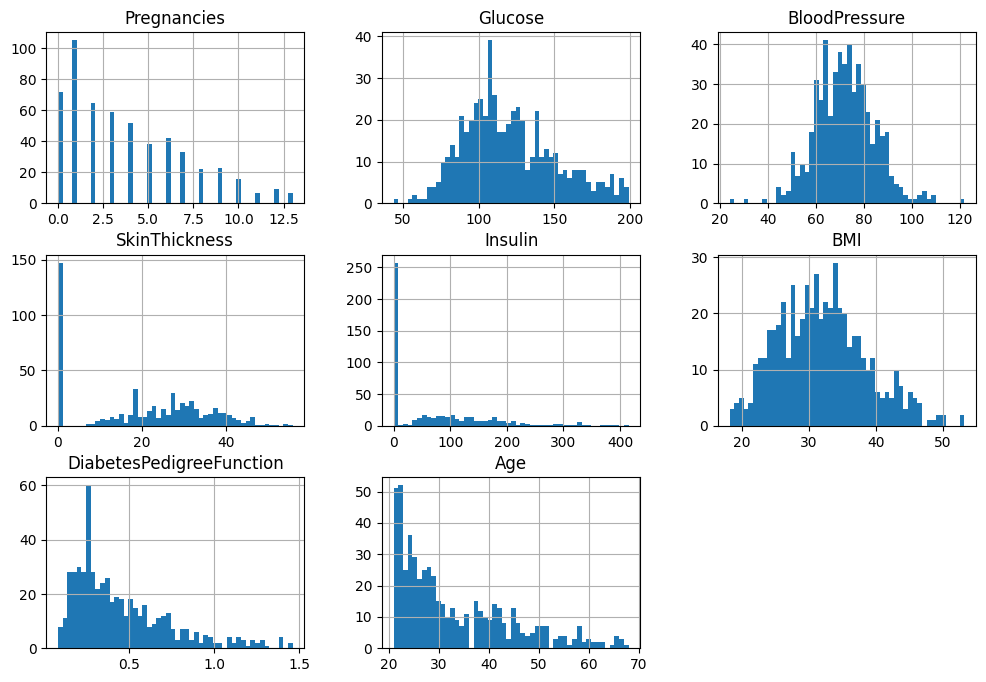

In [ ]:
#plotting histogram of Training data

X_train.hist(figsize=(12,8),bins=50)
plt.show()

**Task 2 - Model Building and hyper-parameter tuning**

**2.a,Logistic Regression Modelling**

In [ ]:
# create the logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Make predictions
y_predict = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.7536231884057971
Precision: 0.8064516129032258
Recall: 0.4716981132075472
F1 Score: 0.5952380952380953


**2.b, Grid search and Random Search**

In [ ]:
#Grid search
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('dataset.csv')

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the parameter grid
param_grid = {
  'C': [0.01, 0.1, 1, 10, 100],
  'penalty': ['l1', 'l2'],  # Note: 'l1' requires solver='liblinear'
  'solver': ['liblinear']   # 'liblinear' supports both 'l1' and 'l2'
}

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Set up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Test Set Precision:", precision)
print("Test Set Recall:", recall)
print("Test Set F1 Score:", f1)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7655204584832733
Test Set Accuracy: 0.7532467532467533
Test Set Precision: 0.6545454545454545
Test Set Recall: 0.6545454545454545
Test Set F1 Score: 0.6545454545454545


**Random Search**

In [ ]:
# Random Search

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import uniform

# Load the dataset
data = pd.read_csv('dataset.csv')

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distribution
param_dist = {
  'C': uniform(loc=0.01, scale=10),  # Uniform distribution for C
  'penalty': ['l1', 'l2'],           # Note: 'l1' requires solver='liblinear'
  'solver': ['liblinear']            # 'liblinear' supports both 'l1' and 'l2'
}

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Set up the random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Test Set Precision:", precision)
print("Test Set Recall:", recall)
print("Test Set F1 Score:", f1)

Best Parameters: {'C': 3.275407688058354, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7720111955217913
Test Set Accuracy: 0.7532467532467533
Test Set Precision: 0.6545454545454545
Test Set Recall: 0.6545454545454545
Test Set F1 Score: 0.6545454545454545


**Confusion Matrix**

Confusion Matrix:
[[78 21]
 [18 37]]


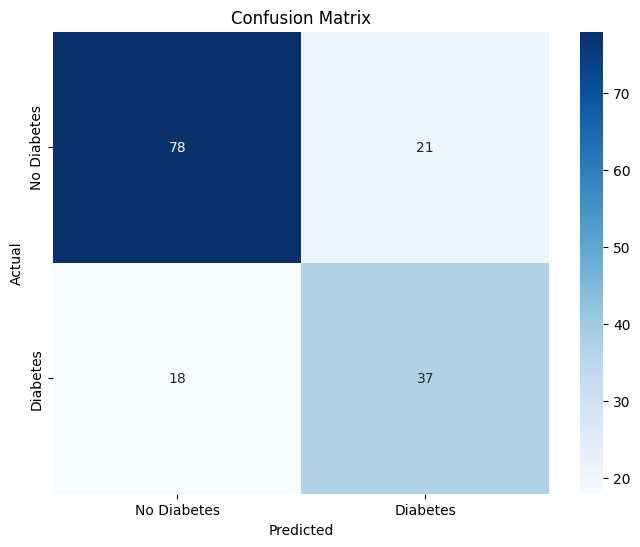

In [ ]:
# Calculate the confusion matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('dataset.csv')

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load the dataset
data = pd.read_csv('dataset.csv')

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"{k}-Fold Cross-Validation Accuracy: {mean_cv_score:.4f} ± {std_cv_score:.4f}")

5-Fold Cross-Validation Accuracy: 0.7683 ± 0.0187


In [ ]:
# Define K values to evaluate
k_values = [5, 8, 10,12,15]


# Evaluate the model
results = evaluate_model_with_kfold(X, y, k_values)

Evaluating with K=5
Mean Accuracy: 0.77, Standard Deviation: 0.02

Evaluating with K=8
Mean Accuracy: 0.77, Standard Deviation: 0.02

Evaluating with K=10
Mean Accuracy: 0.77, Standard Deviation: 0.02

Evaluating with K=12
Mean Accuracy: 0.77, Standard Deviation: 0.04

Evaluating with K=15
Mean Accuracy: 0.77, Standard Deviation: 0.03



In [ ]:
# Print summary of results
for k, (mean, std) in results.items():
    print(f"K={k}: Mean Accuracy={mean:.2f}, Std={std:.2f}")

K=5: Mean Accuracy=0.77, Std=0.02
K=8: Mean Accuracy=0.77, Std=0.02
K=10: Mean Accuracy=0.77, Std=0.02
K=12: Mean Accuracy=0.77, Std=0.04
K=15: Mean Accuracy=0.77, Std=0.03


In [ ]:
# Print summary of results
for k, (mean, std) in results.items():
    print(f"K={k}: Mean Accuracy={mean}, Std={std}")

K=5: Mean Accuracy=0.7707919531448943, Std=0.015674401173152334
K=8: Mean Accuracy=0.7747395833333333, Std=0.017995149688913095
K=10: Mean Accuracy=0.7733766233766234, Std=0.02467532467532469
K=12: Mean Accuracy=0.7721354166666666, Std=0.03851614442122146
K=15: Mean Accuracy=0.7747611865258924, Std=0.03404281107260619
